### 查看Ipython的魔术命令列表

In [41]:
%magic

In [42]:
%timeit range(1000)

The slowest run took 5.79 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 522 ns per loop


In [43]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %

In [44]:
%ls -l -h

 驱动器 C 中的卷没有标签。
 卷的序列号是 E842-0A7D

 C:\Users\LW\Documents 的目录


 C:\Users\LW\Documents 的目录



找不到文件


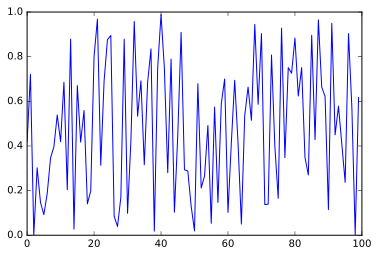

In [45]:
%matplotlib inline
%config InlineBackend.figure_format="svg"
# inline表示把图表内嵌到Notebok中,这样是一个图文交互静态的Notebok，无法交互
# 通过%config命令修改配置,比如把图片的格式改为svg
import pylab as pl
pl.seed(1)
data = pl.random(100)
pl.plot(data);

In [3]:
%matplotlib qt4
# 以qt界面库显示图表，这样就可以弹出一个窗口可以用鼠标和键盘进行交互
# 该功能只能再运行Ipython Kernerl的机器上显示图表
import pylab as pl
pl.seed(1)
data = pl.random(100)
pl.plot(data);

In [47]:
%%time
# 使用%%time和%%timeit进行性能分析，time执行一次计算总时间，timeit运行多次计算每次循环的时间
a = []
for i in range(0,10000):
    a.append(i)

Wall time: 4 ms


In [48]:
%%capture result
# time和timeit命令都将信息使用print输出，如果希望用程序分析这些结果信息，可以使用%%capture命令，将单元格的输出保存为一个对象
import numpy as np
for i in [1000, 5000, 10000, 50000, 100000, 500000]:
    arr = np.random.rand(i)
    print("i={0}".format(i))
    %timeit -n20 np.sort(arr)

In [49]:
print(result) #%timeit命令统计不同长度数组的长度排序

i=1000
20 loops, best of 3: 64 us per loop
i=5000
20 loops, best of 3: 305 us per loop
i=10000
20 loops, best of 3: 717 us per loop
i=50000
20 loops, best of 3: 5.4 ms per loop
i=100000
20 loops, best of 3: 10.6 ms per loop
i=500000
20 loops, best of 3: 63.9 ms per loop



### 使用re模块从上面字符串获取信息，并可视化时间复杂度

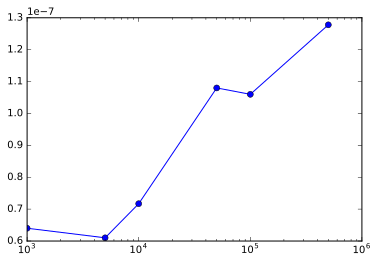

In [50]:
%matplotlib inline
import numpy as np
import pylab as pl

def tosec(t):
    units = {"ns":1e-9, "us":1e-6, "ms":1e-3, "s":1}
    value, unit = t.strip().split()
    return float(value) * units[unit]
import re
info = re.findall(r"i=(.+?)\n.+best of 3:(.+?) per loop",result.stdout)
info = [(int(t0), tosec(t1)) for t0, t1 in info]
x, y = np.r_[info].T
pl.semilogx(x, y/x, "-o");

In [4]:
from mayavi import mlab


ImportError: No module named 'mayavi'

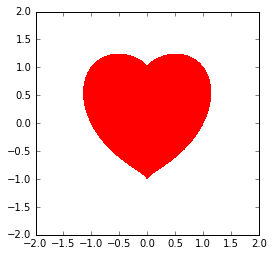

In [5]:
%matplotlib inline
import numpy as np
import pylab as pl

x,y =np.mgrid[-2:2:500j, -2:2:500j]
z = (x**2 + y**2 -1)**3 - x**2 * y**3
pl.contourf(x, y, z, levels=[-1, 0], colors=["red"])
pl.gca().set_aspect("equal")

In [6]:
import json
path = r"C:\Users\LW\Desktop\Mypython\ds.txt"
recodes = [json.loads(line) for line in open(path,'r',encoding='utf-8')]
# 编码出错待议


JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)

### 雅虎财经的一个时间序列

NameError: name 'kkk' is not defined

### 创建一个10.1到10.7的时间序列

In [6]:
import pandas as pd
dates = pd.date_range('20161001',periods=7)
print(dates)

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07'],
              dtype='datetime64[ns]', freq='D')


In [9]:
import numpy as np
import pandas as pd

pd.DataFrame(np.random.randn(7,3),index=dates, columns=list('ABC'))


,A,B,C
2016-10-01,-1.166151,0.511420,-0.819469
2016-10-02,-1.307653,-0.283113,0.643425
2016-10-03,-2.785081,0.894268,-0.458402
2016-10-04,-1.501033,0.996423,-0.467598
2016-10-05,0.569859,0.869243,0.634198
2016-10-06,1.188210,-1.686834,0.319238
2016-10-07,0.225536,0.117633,0.626002


### 对pandas中DataFrame进行数据选择
1. 获取各个属性值
索引：quotesdf.index 列名：quotesdf.columns 具体值：quotesdf.values 详细描述quotesdf.describ
2. 获取单列的值
quotesdf['date']  或者quotesdf.date
3. 截取多行记录
quotesdf['2016-08-09':'2016-08-15']   
[]中的索引名字一定要对，有时候是u''这种的unicode字符
#### 使用位置进行选择
1.截取某行到某行，某列到某列
quotesdf.loc[1:5,] 列名可以省略  quotesdf.loc['2016-10-20':'2016-10-25',] index一定要对应
quotesdf.1oc[:,['open','close']] **行名默认：代替**    列名之间用逗号,分割
quotesdf.at[1,'open'] 获取单个值
> loc使用的是行标签和列标签['open'，'close'] 
>iloc使用的行位置和列位置[1,3] 
>同样是包前不包后原则，[]中间的值都是以逗号分隔

quotesdf.iloc[1:5,[2,4]] 1到4列，2到3行 
quotesdf.iat[1,2] 获得第1行第2列
#### 添加条件选择
quotesdf[(quotesdf.index>='2016-10-05')&(quotesdf.close>=65)]
quotesdf[(quotesdf.high>67)&(quotesdf.index>'2016-10-15')].index
都使用.加列名获得属性，这样好记

### 简单统计
**总而言之以quotesdf也就是DataFrame为操作对象**

1. 计算平均值
quotesdf.mean(columns='high')
<br/>
2. 统计股票涨的天数 len函数
len(quotesdf[quotesdf.open>quotesdf.close])
<br/>
3. 统计股票涨的天数 len函数
251 - len(quotesdf[quotesdf.open>quotesdf.close])
<br/>
4. 统计相邻两天收盘价的涨跌情况 用到numpy.diff函数
import numpy as np
status = np.sign(np.diff(quotesdf.close))
[ 1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,
-1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.]
（1）统计涨的天数
status[np.where(status == 1)].size
Out[42]: 128
（2）统计跌的天数
status[np.where(status == -1.)].size
Out[43]: 122

***

</br>
</br>

---

### python增强的格式化字符串函数format()

[++参考外链++](http://www.open-open.com/lib/view/open1411048734531.html)

[++python输出格式化%及函数format++](https://my.oschina.net/dillan/blog/133877)

 **下面只是测试，具体用法看外链**

#### 通过关键字

In [2]:
# format()使用 {} 和 : 替代%
# 通过位置格式化字符串
'{1},{0}'.format('abc',12)

'12,abc'

In [3]:
'{0},{1},{0}'.format('abc',12)

'abc,12,abc'

#### 通过关键字

In [6]:
'{name}{age}'.format(name='laiwei',age=23)

'laiwei23'

#### 通过对象属性

In [12]:
class Person:
    def __init__(self,name,age):
        self.name,self.age = name,age
    def __str__(self):
        return 'the person is {self.name},age is {self.age}'.format(self=self)

In [13]:
str(Person('laiwei',24))

'the person is laiwei,age is 24'

#### 通过列表的下标

In [15]:
p =['zhangsan','lisi',15,24]
'{0[0]},{0[3]}'.format(p)

'zhangsan,24'

### 格式限定符
---
语法是 `{}`中带`:`
：后面是填充的字符
^ < > 分别表示居中、左对齐、右对齐，后面是宽度

In [17]:
'{:>8}'.format('wal')

'     wal'

In [18]:
'{:0^8}'.format('wal')

'00wal000'

In [20]:
'{:b>8}'.format('189')

'bbbbb189'

#### 精度与类型f
精度常跟类型f一起使用

In [24]:
'{:.2f}'.format(321.156)

'321.00'

In [36]:
'${:,.2f}'.format(288950.126)
# 用，号还能用来做金额的千位分隔符。
# ，应该是.前面，每三位一分割
# 其中.2表示长度为2的精度，f表示float类型。

'$288,950.13'

### 其他类型
b、d、o、x分别是二进制，十进制，八进制，十六进制

In [38]:
'{:b}'.format(17)

'10001'

In [39]:
'{:d}'.format(17)

'17'

In [41]:
'{:o}'.format(17)

'21'

In [42]:
'{:x}'.format(17)

'11'

In [3]:
from numpy.random import randn

In [5]:
arr = randn(5,4)

In [6]:
arr.sort()

In [7]:
arr

array([[-1.34208483, -0.31983449, -0.24129569,  1.01012114],
       [-1.06887276,  0.57458268,  0.88180101,  2.06771174],
       [-1.05957414,  0.46585365,  1.0744237 ,  1.15987705],
       [-0.09772424,  0.04843087,  0.65460397,  1.1892566 ],
       [-0.36274902,  0.23193315,  0.51538057,  1.59096772]])

In [9]:
arr.ndim

2

In [11]:
arr.sort(1)

In [1]:
import numpy as np

values = np.array([6,0,0,3,2,5,6])


In [2]:
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

In [3]:
arr = np.arange(10)

In [4]:
np.save('some_array', arr)

In [5]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.ones(3)

array([ 1.,  1.,  1.])

In [20]:
from numpy.random import randn

arr = randn(5,5)

In [22]:
arr.shape

(5, 5)

In [25]:
np.linalg.det(arr)

-8.4767012408750126

In [26]:
nstep = 1000

In [28]:
draws = np.random.randint(0,2,size = nstep)

In [31]:
steps = np.where(draws>0 , 1 , -1)

In [37]:
walk = steps.cumsum()

In [39]:
walk.min()

-28

In [40]:
walk.max()

15

In [41]:
nsteps = 1000

In [42]:
draws = np.random.randint(0,2, size =nsteps)

In [44]:
nwalks = 5000
nsteps = 1000

In [45]:
draws = np.random.randint(0,2, size=(nwalks,nsteps))

In [50]:
steps = np.where(draws>0, 1,-1)

In [54]:
draws

array([[0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ..., 
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0]])

In [69]:
hints = np.in1d(draws, [0,2]).any(0)

In [70]:
hints

True

In [58]:
arr[0]

array([0, 1, 2, 3])

In [59]:
arr[1]

array([4, 5, 6, 7])

In [60]:
arr[0,0]

0